In [9]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
pd.options.mode.chained_assignment = None

## Loading and preparing data

In [10]:
c_dataset = pd.read_csv('car_dataset.csv', low_memory=False)
c_dataset.dropna(axis='columns', how='all', inplace=True)
print(c_dataset.shape)

(70823, 71)


Choosing columns that fit the project idea

In [11]:
cars_fc = c_dataset.dropna(subset=['mixed_fuel_consumption_per_100_km_l'])
cars_fc['boost_type'] = cars_fc['boost_type'].fillna('none')
cars_fc = cars_fc.dropna(axis='columns', thresh=4300)
cars_fc = cars_fc.loc[:, ['number_of_seats', 'length_mm',
       'width_mm', 'height_mm', 'curb_weight_kg', 'maximum_torque_n_m',
       'injection_type', 'cylinder_layout', 'number_of_cylinders',
       'engine_type', 'valves_per_cylinder', 'turnover_of_maximum_torque_rpm', 'boost_type',
       'capacity_cm3', 'engine_hp', 'engine_hp_rpm', 'drive_wheels',
       'number_of_gears', 'mixed_fuel_consumption_per_100_km_l']]

cars_fc.head()

,number_of_seats,length_mm,width_mm,height_mm,curb_weight_kg,maximum_torque_n_m,injection_type,cylinder_layout,number_of_cylinders,engine_type,valves_per_cylinder,turnover_of_maximum_torque_rpm,boost_type,capacity_cm3,engine_hp,engine_hp_rpm,drive_wheels,number_of_gears,mixed_fuel_consumption_per_100_km_l
2,2,4420.0,1870.0,1300.0,1440.0,434,Multi-point fuel injection,V-type,8.0,Gasoline,2.0,3250.0,none,4942.0,260.0,5250.0,Rear wheel drive,4.0,8.0
9,4,4660.0,1890.0,1340.0,1615.0,407,Injector,V-type,8.0,Gasoline,4.0,4000.0,none,3506.0,354.0,6500.0,Rear wheel drive,6.0,13.4
11,4,4660.0,1890.0,1340.0,1615.0,427,Injector,V-type,8.0,Gasoline,4.0,4600.0,none,4601.0,326.0,5800.0,Rear wheel drive,5.0,12.2
12,2,4155.0,1745.0,1230.0,1155.0,407,Injector,V-type,8.0,Gasoline,2.0,3200.0,none,4942.0,228.0,4000.0,Rear wheel drive,5.0,14.4
15,2,4115.0,1735.0,1245.0,980.0,579,carburetor,V-type,8.0,Gasoline,2.0,4500.0,none,4942.0,370.0,5750.0,Rear wheel drive,5.0,15.7


In [12]:
cars_fc['boost_type'] = cars_fc['boost_type'].fillna('none')
cars_fc['boost_type'] = cars_fc['boost_type'].replace(['Twin-scroll', 'Turbine + compressor', 'Biturbo', 'compressor'], 'Turbo')

cars_fc = cars_fc.dropna()

cars_fc.value_counts(['boost_type'])

boost_type
none          3634
Turbo          626
Name: count, dtype: int64

One-hot encoding of the categorical data

In [13]:
cars_fc = cars_fc.convert_dtypes()
cars_fc['maximum_torque_n_m'] = cars_fc['maximum_torque_n_m'].str.split('/').str[0].astype(int)
cars_fc = cars_fc.astype({'number_of_seats': 'Int64', 'maximum_torque_n_m' : 'Int64'})

cat_only_data = cars_fc.select_dtypes(include=['string[python]'])
cat_hot_one = pd.get_dummies(cat_only_data, drop_first=True)

cars_fc_h = cars_fc.drop(list(cat_only_data),axis=1)

cars_fc_h = pd.concat([cars_fc_h, cat_hot_one], axis=1)

cars_fc_target = cars_fc_h.loc[:, ['mixed_fuel_consumption_per_100_km_l']]
cars_fc_data = cars_fc_h.drop(['mixed_fuel_consumption_per_100_km_l'], axis='columns')

cars_fc_data.head()

,number_of_seats,length_mm,width_mm,height_mm,curb_weight_kg,maximum_torque_n_m,number_of_cylinders,valves_per_cylinder,turnover_of_maximum_torque_rpm,capacity_cm3,...,cylinder_layout_V-type,cylinder_layout_W-type,cylinder_layout_inline,engine_type_Gas,engine_type_Gasoline,engine_type_Hybrid,boost_type_none,drive_wheels_Four wheel drive (4WD),drive_wheels_Front wheel drive,drive_wheels_Rear wheel drive
2,2,4420,1870,1300,1440,434,8,2,3250,4942,...,True,False,False,False,True,False,True,False,False,True
9,4,4660,1890,1340,1615,407,8,4,4000,3506,...,True,False,False,False,True,False,True,False,False,True
11,4,4660,1890,1340,1615,427,8,4,4600,4601,...,True,False,False,False,True,False,True,False,False,True
12,2,4155,1745,1230,1155,407,8,2,3200,4942,...,True,False,False,False,True,False,True,False,False,True
15,2,4115,1735,1245,980,579,8,2,4500,4942,...,True,False,False,False,True,False,True,False,False,True


In [14]:
cars_fc_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4260 entries, 2 to 70813
Data columns (total 30 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   number_of_seats                            4260 non-null   Int64  
 1   length_mm                                  4260 non-null   Int64  
 2   width_mm                                   4260 non-null   Int64  
 3   height_mm                                  4260 non-null   Int64  
 4   curb_weight_kg                             4260 non-null   Int64  
 5   maximum_torque_n_m                         4260 non-null   Int64  
 6   number_of_cylinders                        4260 non-null   Int64  
 7   valves_per_cylinder                        4260 non-null   Int64  
 8   turnover_of_maximum_torque_rpm             4260 non-null   Int64  
 9   capacity_cm3                               4260 non-null   Int64  
 10  engine_hp                   

Saving prepared data to csv

In [15]:
cars_fc_save = pd.concat([cars_fc_data, cars_fc_target], axis=1)
cars_fc_save.to_csv('model_input.csv', index=False)

Additonal plots of fuel consumption in relation to every feature

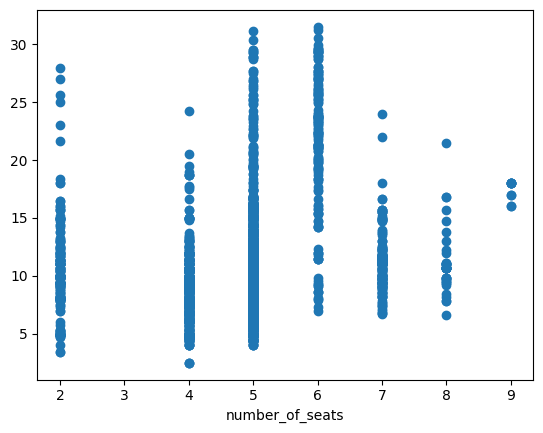

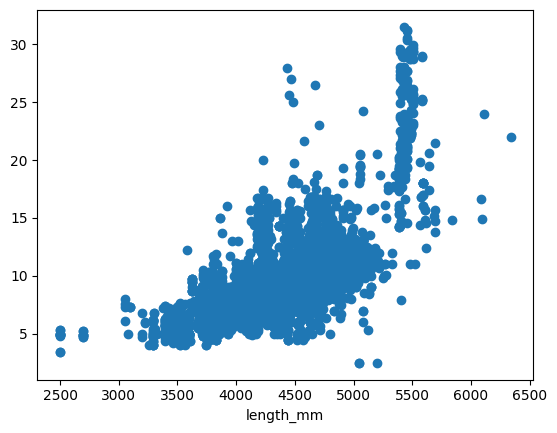

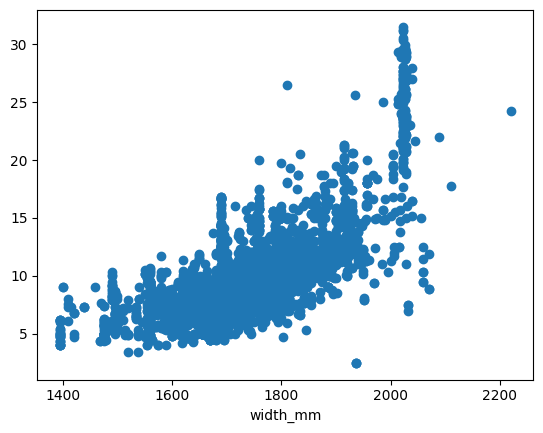

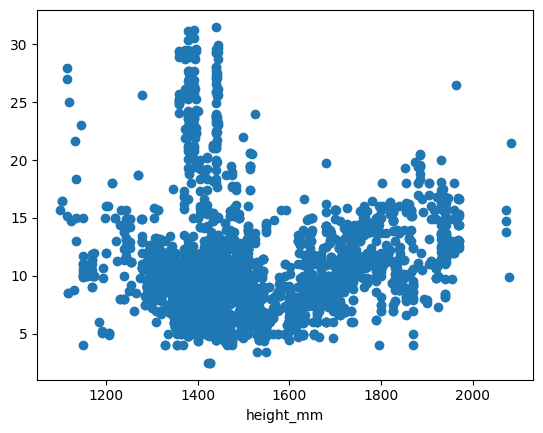

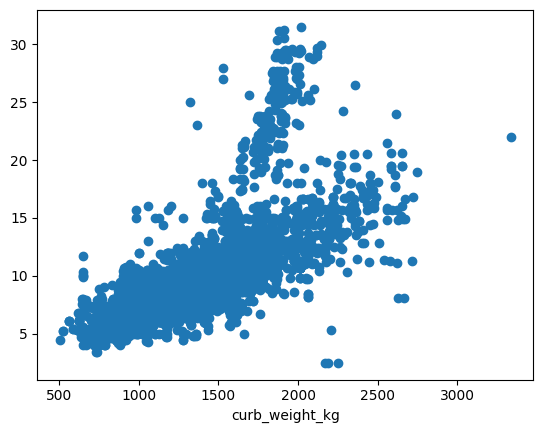

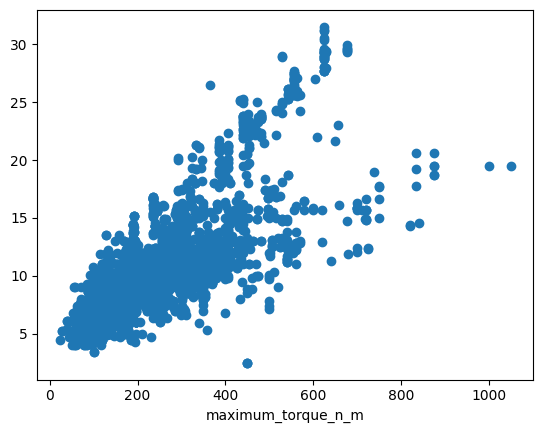

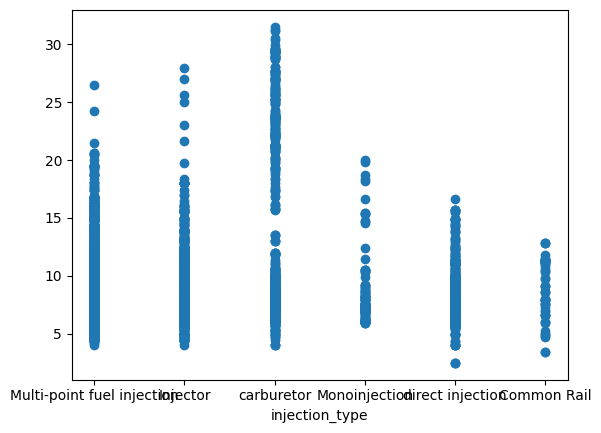

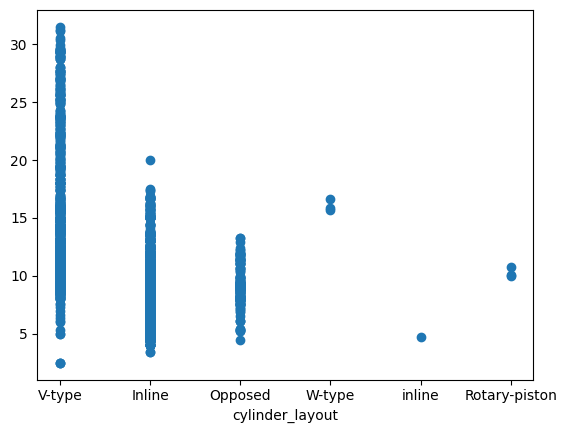

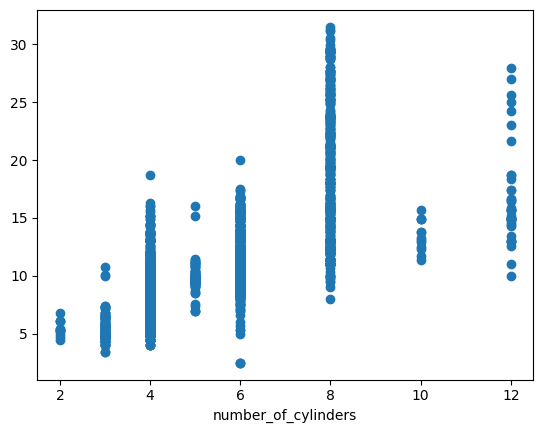

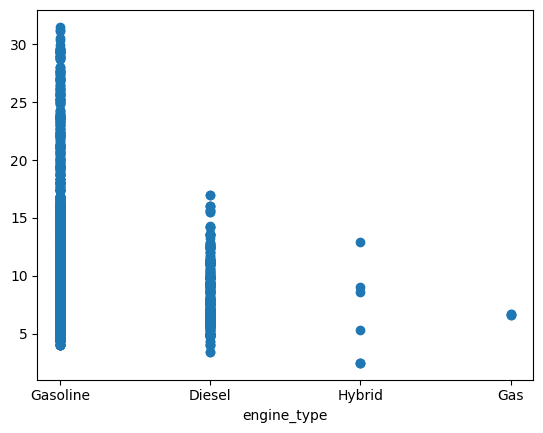

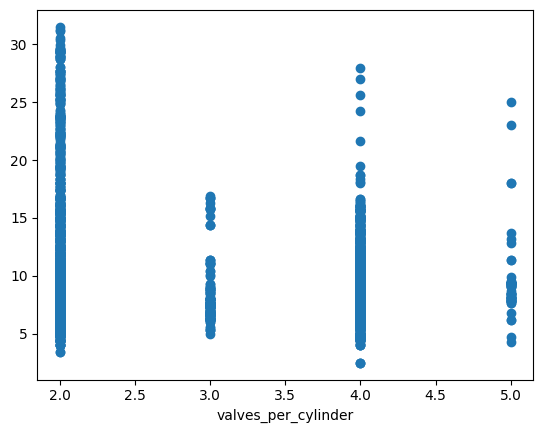

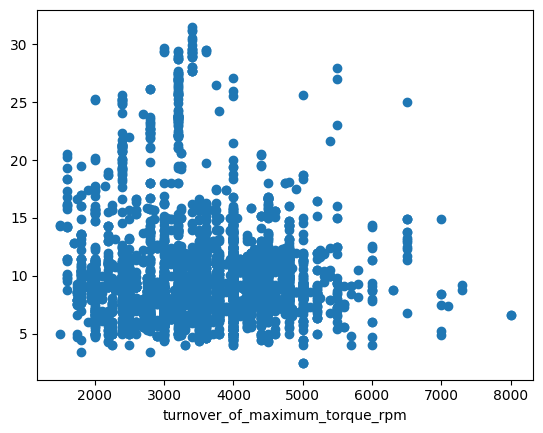

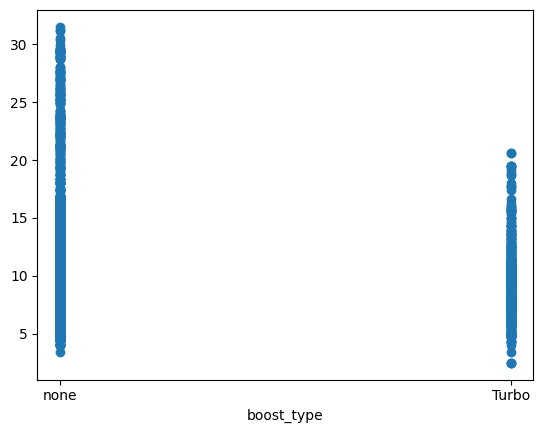

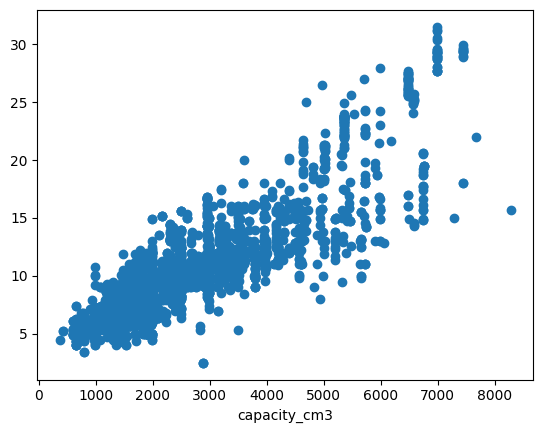

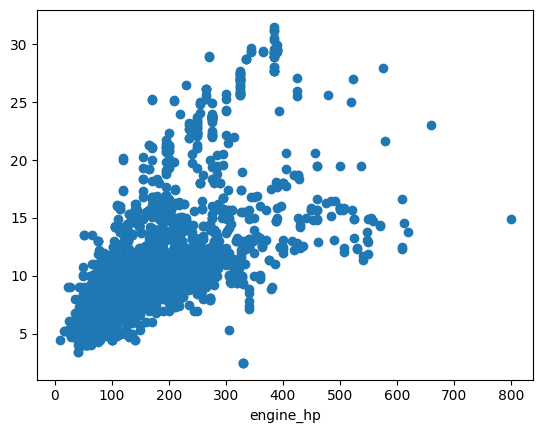

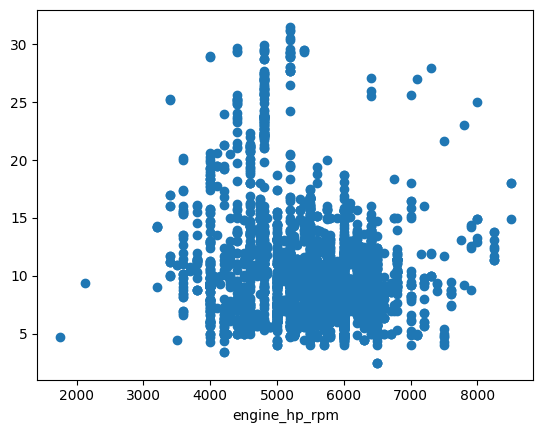

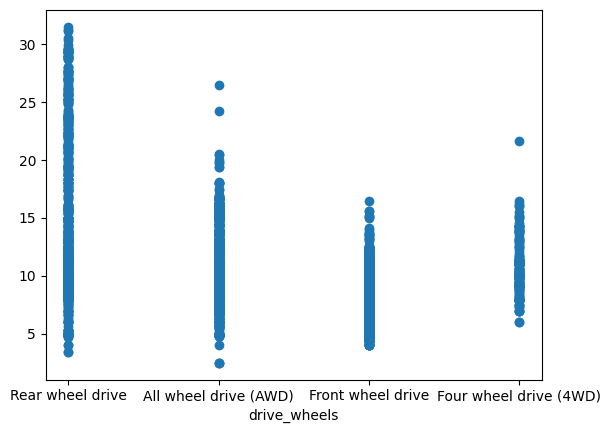

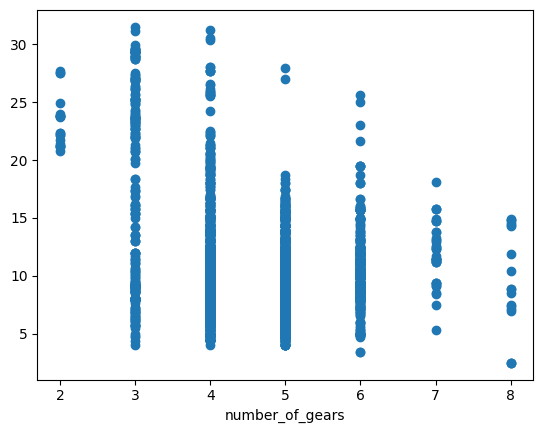

In [16]:
cars_plots = cars_fc.drop(['mixed_fuel_consumption_per_100_km_l'], axis='columns')
for column in cars_plots:
    plt.figure()
    plt.scatter(cars_plots[column], cars_fc_target)
    plt.xlabel(column)
    plt.show()